# 1 array: basics

### basic slicing: 1D arrays

One-dimensional arrays are simple; on the surface they act similarly to Python lists:

In [2]:
import numpy as np

In [15]:
data = np.arange(10)
print(data)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
# so elements from 1 (inclusive) to 3 (exclusive)
data[1:3]

array([1, 2])

An important first distinction from lists is that array slices are **views on the original array**. This means that the data **is not copied**, and any modifications to the view will be reflected in the source array. This is the case **not only with slices**, but with array itself.

In [16]:
# the value is propagated
data[1:3] = 10
print(data)

[ 0 10 10  3  4  5  6  7  8  9]


In [17]:
data2 = data
data2[0] = 100
print(data, data2)

[100  10  10   3   4   5   6   7   8   9] [100  10  10   3   4   5   6   7   8   9]


In [18]:
# use copy() if you really need to do it
data_slice = data[1:3].copy()
data_slice[:] = -1
print(data, data_slice)

[100  10  10   3   4   5   6   7   8   9] [-1 -1]


### basic slicing: 2D arrays

In [26]:
data = np.arange(8).reshape((2, 4))
print(data)

[[0 1 2 3]
 [4 5 6 7]]


In [29]:
# we may use index or slicing on axis (on one of them or both)
data[0, :]

array([0, 1, 2, 3])

In [31]:
data[0:2, :]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [35]:
data[0, 1:3]

array([1, 2])

In [33]:
data[:, 0]

array([0, 4])

In [32]:
data[:, 1:3]

array([[1, 2],
       [5, 6]])

In [34]:
# in case of axis = 0 we may omit ':'
data[0]

array([0, 1, 2, 3])

In [52]:
data

array([ 0.38609767,  0.36868658,  0.16508169,  0.99863529,  0.689861  ,
        0.36448595,  0.12993494])

In [53]:
data[:-1]

array([ 0.38609767,  0.36868658,  0.16508169,  0.99863529,  0.689861  ,
        0.36448595])

### boolean indexing

In [38]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(names)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']


In [39]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [41]:
names[names != 'Bob']

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [42]:
data = np.random.rand(7)
print(data)

[ 0.15221966  0.46850986  0.27025998  0.69096695  0.39687817  0.18215971
  0.31928101]


In [43]:
data[names == 'Bob']

array([ 0.15221966,  0.69096695])

In [45]:
data[data > .3]

array([ 0.46850986,  0.69096695,  0.39687817,  0.31928101])

In [46]:
data[data > .3] = -1
print(data)

[ 0.15221966 -1.          0.27025998 -1.         -1.          0.18215971
 -1.        ]


In [49]:
mask = (names == 'Bob') | (names == 'Will')
print(mask)

[ True False  True  True  True False False]


In [47]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [50]:
data = np.random.rand(7)
print(data)

[ 0.38609767  0.36868658  0.16508169  0.99863529  0.689861    0.36448595
  0.12993494]


In [51]:
data[mask]

array([ 0.38609767,  0.16508169,  0.99863529,  0.689861  ])

### fancy slicing: 1D arrays

In [83]:
arr = np.arange(10) * 10

In [84]:
arr

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [85]:
a = np.array([1, 4, 7])

In [86]:
arr[a]

array([10, 40, 70])

In [87]:
b = np.array([5, 3, 7])

In [88]:
arr[b]

array([50, 30, 70])

In [89]:
c = np.array([-3, -1, -5])

In [90]:
arr[c]

array([70, 90, 50])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

In [91]:
arr2 = arr[a]

In [92]:
arr2

array([10, 40, 70])

In [93]:
arr2[0] = 1000

In [94]:
arr2

array([1000,   40,   70])

In [95]:
arr

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

### example with weather data

In [122]:
dt = np.dtype([('Month', 'int8'), ('Day', 'int8'), ('Year', 'int16'), ('Temp', 'float64')])
data = np.loadtxt('CALOSANG.txt',dtype=dt)

In [97]:
data

array([(1, 1, 1995, 56.4), (1, 2, 1995, 55.1), (1, 3, 1995, 54.3), ...,
       (6, 21, 2013, 68.4), (6, 22, 2013, 68.4), (6, 23, 2013, 66.1)], 
      dtype=[('Month', 'i1'), ('Day', 'i1'), ('Year', '<i2'), ('Temp', '<f8')])

In [98]:
data.size

6749

In [123]:
temp = data['Temp']

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

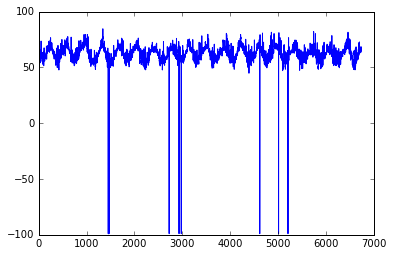

In [108]:
plt.plot(temp)

In [109]:
temp.min()

-99.0

In [111]:
data[temp == -99.0]

array([(12, 24, 1998, -99.0), (12, 25, 1998, -99.0), (12, 30, 1998, -99.0),
       (12, 31, 1998, -99.0), (1, 10, 1999, -99.0), (6, 18, 2002, -99.0),
       (6, 19, 2002, -99.0), (6, 20, 2002, -99.0), (6, 21, 2002, -99.0),
       (1, 13, 2003, -99.0), (3, 1, 2003, -99.0), (8, 28, 2007, -99.0),
       (9, 24, 2008, -99.0), (4, 9, 2009, -99.0)], 
      dtype=[('Month', 'i1'), ('Day', 'i1'), ('Year', '<i2'), ('Temp', '<f8')])

In [113]:
temp[temp != -99.0].min()

44.799999999999997

In [116]:
na_vals = np.where(temp == -99.0)

In [117]:
na_vals

(array([1453, 1454, 1459, 1460, 1470, 2725, 2726, 2727, 2728, 2934, 2981,
        4622, 5015, 5212]),)

In [118]:
temp[na_vals] = 44.8

In [130]:
# i don't really understand how na_vals works
# but with na_vals[0] we have fancy indexing
na_vals[0]

array([1453, 1454, 1459, 1460, 1470, 2725, 2726, 2727, 2728, 2934, 2981,
       4622, 5015, 5212])

In [126]:
temp[na_vals]

array([-99., -99., -99., -99., -99., -99., -99., -99., -99., -99., -99.,
       -99., -99., -99.])

In [127]:
temp[na_vals[0]]

array([-99., -99., -99., -99., -99., -99., -99., -99., -99., -99., -99.,
       -99., -99., -99.])

In [128]:
temp[na_vals[0]] = 44.8

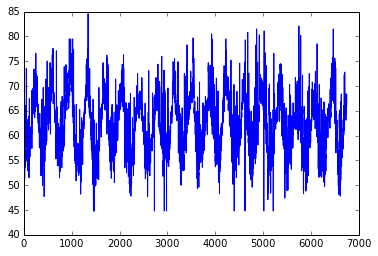

In [129]:
plt.plot(temp)

# 2 functions

# 3 file i/o

### binary i/o

In [54]:
arr = np.arange(10)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [55]:
np.save('some_array.npy', arr)

In [58]:
! ls | grep 'some'

some_array.npy


In [59]:
arr2 = np.load('some_array.npy')
print(arr2)

[0 1 2 3 4 5 6 7 8 9]


In [75]:
! hexdump some_array.npy

0000000 93 4e 55 4d 50 59 01 00 46 00 7b 27 64 65 73 63
0000010 72 27 3a 20 27 3c 69 38 27 2c 20 27 66 6f 72 74
0000020 72 61 6e 5f 6f 72 64 65 72 27 3a 20 46 61 6c 73
0000030 65 2c 20 27 73 68 61 70 65 27 3a 20 28 31 30 2c
0000040 29 2c 20 7d 20 20 20 20 20 20 20 20 20 20 20 0a
0000050 00 00 00 00 00 00 00 00 01 00 00 00 00 00 00 00
0000060 02 00 00 00 00 00 00 00 03 00 00 00 00 00 00 00
0000070 04 00 00 00 00 00 00 00 05 00 00 00 00 00 00 00
0000080 06 00 00 00 00 00 00 00 07 00 00 00 00 00 00 00
0000090 08 00 00 00 00 00 00 00 09 00 00 00 00 00 00 00
00000a0


### text i/o

In [66]:
arr = np.arange(8).reshape((4, 2))

In [67]:
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [68]:
np.savetxt('array_ex.txt', arr)

In [69]:
! ls | grep 'txt'

array_ex.txt


In [72]:
arr2 = np.loadtxt('array_ex.txt', dtype='i4')

In [73]:
arr2

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]], dtype=int32)

In [74]:
! cat array_ex.txt

0.000000000000000000e+00 1.000000000000000000e+00
2.000000000000000000e+00 3.000000000000000000e+00
4.000000000000000000e+00 5.000000000000000000e+00
6.000000000000000000e+00 7.000000000000000000e+00
